In [18]:
import numpy as np
import scipy as sp
import cv2 as cv
from matplotlib import pyplot as plt


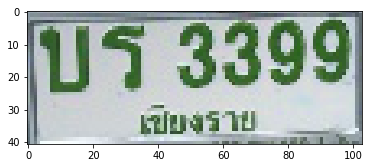

In [2]:
x = cv.imread('./cars/positive/resize_step_3_008.jpg')
plt.imshow(x)

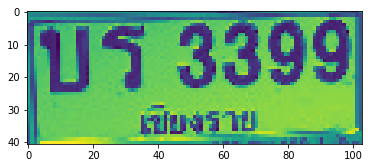

In [37]:
gray = cv.cvtColor(x,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

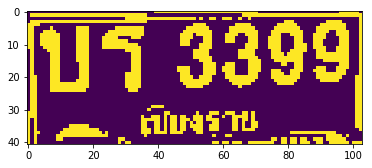

In [43]:
adaptive = cv.adaptiveThreshold(gray,
                                 255,
                                 cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv.THRESH_BINARY_INV,
                                31,5)
# ret,adaptive = cv.threshold(gray,150,255, cv.THRESH_BINARY)
plt.imshow(adaptive)

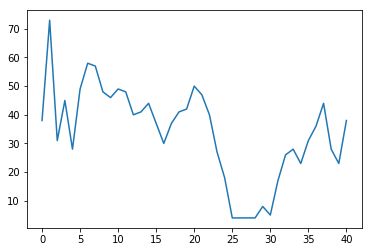

In [15]:
adaptive1 = adaptive/255
hist = adaptive1.sum(1)
plt.plot(hist)

In [20]:
from scipy.ndimage.filters import gaussian_filter1d

28


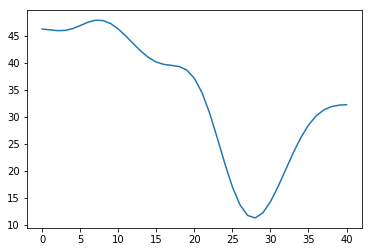

In [29]:
hist2 = gaussian_filter1d(hist,3)
plt.plot(hist2)
print (np.argmin(hist2))

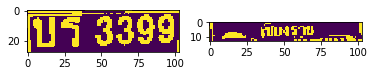

In [32]:
plt.subplot(1,2,1)
plt.imshow(adaptive[:28,:])
plt.subplot(1,2,2)
plt.imshow(adaptive[28:,:])

In [44]:
im1 = adaptive[:28,:]
im2 = adaptive[28:,:]

In [45]:
from scipy import ndimage

In [50]:
labels ,num = ndimage.label(im1)
labels ,num

(array([[0, 0, 0, ..., 1, 1, 0],
        [0, 2, 2, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 2, 2, ..., 0, 1, 1],
        [0, 2, 2, ..., 0, 1, 1],
        [0, 2, 2, ..., 0, 1, 1]]), 12)

In [54]:
objs = ndimage.find_objects(labels,num)

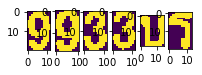

In [70]:
size = len(objs)
j = 1
for i in objs :
    if 25 <im1[i].size < 400:
        plt.subplot(1,size,j)
        j+=1
        plt.imshow(im1[i])
        cv.imwrite("./ocr/rects/char_{:03}.jpg".format(j-1),im1[i])

In [85]:
import os
def cutChar(imagePath, outputPath,filename) :
    x = cv.imread(imagePath)
    x = cv.resize(x,(200,80))
    gray = cv.cvtColor(x,cv.COLOR_BGR2GRAY)
    adaptive = cv.adaptiveThreshold(gray,
                                 255,
                                 cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv.THRESH_BINARY_INV,
                                31,5)
    adaptive1 = adaptive/255
    hist = adaptive1.sum(1)
    hist2 = gaussian_filter1d(hist,3)
    minPos = np.argmin(hist2)
    
    im1 = adaptive[:minPos,:]
    im2 = adaptive[minPos:,:]

    labels ,num = ndimage.label(im1)
    objs = ndimage.find_objects(labels,num)
    size = len(objs)
    j = 1
    for i in objs :
        if 300 < im1[i].size < 1000:
            j+=1
            cv.imwrite(os.path.join(outputPath,"{}_{:03}.jpg".format(filename,j-1)),im1[i])


In [87]:
positivePath = os.path.join('.','cars','positive')
positiveFiles = os.listdir(positivePath)

for i in positiveFiles :
    imgPath = os.path.join(positivePath,i)
    desPath = os.path.join(".","ocr","rects")
    cutChar(imgPath,desPath,i)